## K-means Clustering

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. 

The aim of this problem is to segment the customers of a store based on their annual income and their spending score.

* Annual Income (k$): annual income of the customers
* Spending Score (1-100): spending score of the customers

Lets start with importing our libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, lets import our data and take a look at first couple rows:

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head(4)

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77


Let's see more information about our dataset. 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


Wee see that we don't have any null values. 

In [6]:
dataset.describe()

,CustomerID,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


The descriptive statistics show us that our 2 features (since we cannot use Customer ID as a feature), the other two are in similar scale, so we don't really need to do scaling.

Let's take a look at the relationship between these two variables through a scatter plot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

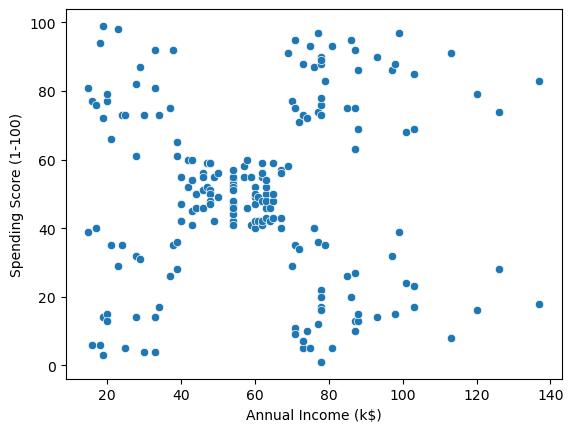

In [8]:
sns.scatterplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data=dataset)

Essentially what we are trying to do is create clusters based on the customer similarity in terms of these two variables. So looking at this scatter plot, we can kind of see some of those clusters. 

Let's import Kmeans library and create our model

In [9]:
from sklearn.cluster import KMeans

SInce K-means is unsupervised, we only have X data, we don't have any y data. And since we won't be using Customer ID column, lets drop that

In [10]:
X=dataset.drop("CustomerID",axis=1)

If we now take a look at X, we only see the two features we will use

In [11]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Let's start with 2 clusters, then we can optimize it later on. And as we discussed, for initialization we will use kmeans++, instead of random

In [12]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',random_state=42)

We fit our model, then we predict

In [13]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [14]:
pred=kmeans.predict(X)

the Within-Cluster-Sum-of-Squares (WCSS) is called inertia under k-means method

In [15]:
kmeans.inertia_

181363.595959596

In order to take a look at the silhoutte score, we first need to import metrics. Then calculate the score. This metric is between +1 representing best clustering and -1 representing worst clustering. 

In [16]:
from sklearn import metrics
metrics.silhouette_score(X, pred)

0.2968969162503008

Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

In a loop, we need to first fit multiple k-means models and in each iteration of the loop, we will increase the number of clusters. We will store the inertia value of each model

In [17]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    wcss.append(kmeans.inertia_)

and lets visualize the wcss values

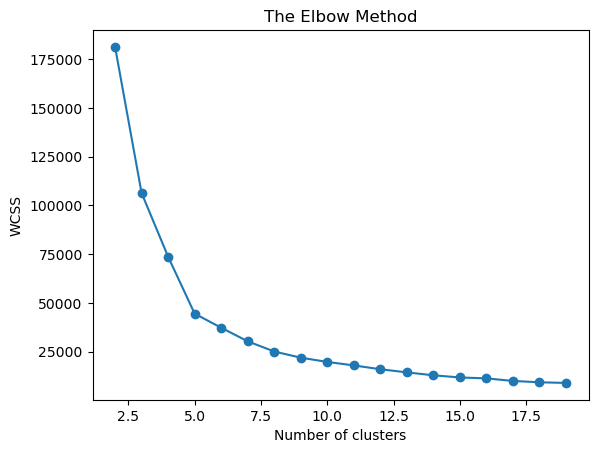

In [18]:
plt.plot(range(2, 20), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looking at the plot, 5 would be good number of clusters to choose since after that the drop is not very substantial. Or 6 would work as well.
Lets take a look at the silhoutte scores, then we can decide

Similar to wcss, we can create a loop for the silhoutte scores and then plot them

In [19]:
s_score = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    s_score.append(metrics.silhouette_score(X, pred))

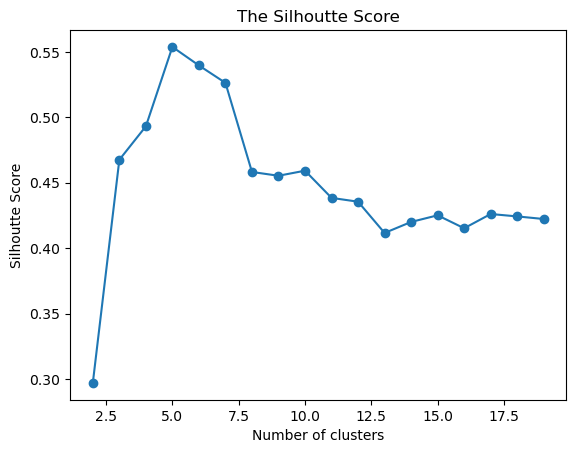

In [20]:
plt.plot(range(2, 20), s_score,marker='o')
plt.title('The Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

From the silhoutte score plot, it is much easier to see 5 would be a better number of clusters, than 6. Since 5 has the highest silhoutte score

Lets re-fit our model with 5 clusters

In [21]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)

If we take a look at the predictions, we can see the cluster labels

In [22]:
pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

We can assign these cluster labels as a column in our dataset

In [23]:
dataset['cluster'] = pred

In [24]:
dataset.head(4)

,CustomerID,Annual Income (k$),Spending Score (1-100),cluster
0,1,15,39,2
1,2,15,81,3
2,3,16,6,2
3,4,16,77,3


We can also take a look at how many points there arfe in each cluster by looking at value counts

In [25]:
dataset['cluster'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster, dtype: int64

And if we re-create our scatter plot, using the cluster numbers as our hue

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

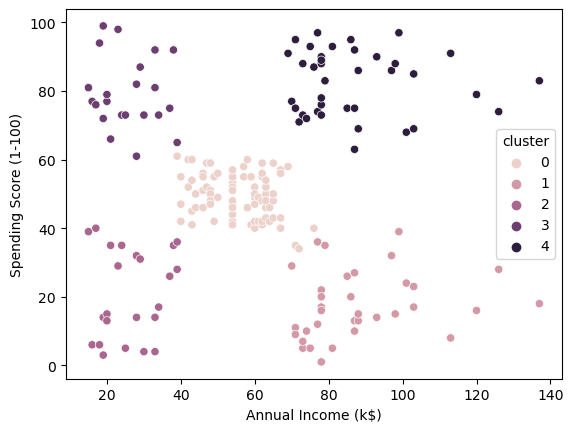

In [26]:
sns.scatterplot(x = "Annual Income (k$)", y ="Spending Score (1-100)",data=dataset,hue="cluster")